In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('fifa21_raw_data.csv')
df.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,...,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,...,High,Medium,5 ★,91,85,86,94,36,59,\n273


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   photoUrl          18979 non-null  object
 1   LongName          18979 non-null  object
 2   playerUrl         18979 non-null  object
 3   Nationality       18979 non-null  object
 4   Positions         18979 non-null  object
 5   Name              18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Team & Contract   18979 non-null  object
 10  ID                18979 non-null  int64 
 11  Height            18979 non-null  object
 12  Weight            18979 non-null  object
 13  foot              18979 non-null  object
 14  BOV               18979 non-null  int64 
 15  BP                18979 non-null  object
 16  Growth            18979 non-null  int64 
 17  Joined      

In [4]:
# Describes the following aspects of the data: Type of the data (integer, float, Python object, etc.)
df.dtypes

photoUrl       object
LongName       object
playerUrl      object
Nationality    object
Positions      object
                ...  
PAS             int64
DRI             int64
DEF             int64
PHY             int64
Hits           object
Length: 77, dtype: object

In [5]:
# Finding the shape of the data
df.shape

(18979, 77)

In [6]:
#Length of Data
len(df)

18979

In [7]:
threshold = len(df)*0.05
threshold

948.95

In [8]:
# Finding Unique values
df.nunique()

photoUrl       18978
LongName       18851
playerUrl      18978
Nationality      164
Positions        640
               ...  
PAS               68
DRI               69
DEF               78
PHY               63
Hits             408
Length: 77, dtype: int64

In [9]:
# description of the data in the DataFrame.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,18979.0,25.194583,4.710753,16.0,21.0,25.0,29.0,53.0
↓OVA,18979.0,65.718636,6.968999,47.0,61.0,66.0,70.0,93.0
POT,18979.0,71.136098,6.114176,47.0,67.0,71.0,75.0,95.0
ID,18979.0,226404.790242,27141.673349,41.0,210135.0,232424.0,246925.5,259216.0
BOV,18979.0,66.751620,6.747017,48.0,62.0,67.0,71.0,93.0
Growth,18979.0,5.417461,5.663954,0.0,0.0,4.0,9.0,26.0
Attacking,18979.0,248.938616,74.299764,42.0,222.0,263.0,297.0,437.0
Crossing,18979.0,49.688551,18.131334,6.0,38.0,54.0,63.0,94.0
Finishing,18979.0,45.842932,19.566978,3.0,30.0,49.0,62.0,95.0
Heading Accuracy,18979.0,51.941883,17.293626,5.0,44.0,55.0,64.0,93.0


In [10]:
df.corr()

,Age,↓OVA,POT,ID,BOV,Growth,Attacking,Crossing,Finishing,Heading Accuracy,...,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
Age,1.000000,0.466280,-0.269359,-0.753289,0.401947,-0.864487,0.146831,0.124751,0.081755,0.146471,...,0.129479,0.117348,0.249941,0.390355,-0.129628,0.265481,0.350146,0.214931,0.223823,0.445848
↓OVA,0.466280,1.000000,0.632130,-0.486873,0.987149,-0.548035,0.446346,0.406610,0.323684,0.325118,...,0.013513,0.005980,0.620846,0.845904,0.266529,0.479263,0.698820,0.654792,0.362996,0.572118
POT,-0.269359,0.632130,1.000000,0.023790,0.669636,0.301709,0.284534,0.255601,0.216774,0.179408,...,-0.035961,-0.037522,0.382002,0.520456,0.305896,0.275212,0.428723,0.479534,0.188065,0.204939
ID,-0.753289,-0.486873,0.023790,1.000000,-0.443608,0.624736,-0.180911,-0.156871,-0.117888,-0.140552,...,-0.123415,-0.110417,-0.291430,-0.434690,0.079155,-0.308239,-0.399228,-0.291112,-0.215972,-0.399495
BOV,0.401947,0.987149,0.669636,-0.443608,1.000000,-0.491736,0.487311,0.423051,0.363130,0.364609,...,-0.039508,-0.047421,0.653355,0.841210,0.274994,0.470944,0.687190,0.648701,0.367752,0.565125
Growth,-0.864487,-0.548035,0.301709,0.624736,-0.491736,1.000000,-0.242037,-0.224380,-0.164259,-0.206360,...,-0.055447,-0.047862,-0.351530,-0.478984,0.002271,-0.292604,-0.397035,-0.288012,-0.243621,-0.482712
Attacking,0.146831,0.446346,0.284534,-0.180911,0.487311,-0.242037,1.000000,0.854189,0.885004,0.732721,...,-0.772984,-0.778214,0.915030,0.449385,0.247017,0.310890,0.352712,0.374325,0.158966,0.155749
Crossing,0.124751,0.406610,0.255601,-0.156871,0.423051,-0.224380,0.854189,1.000000,0.671235,0.481788,...,-0.664946,-0.668457,0.860273,0.495881,0.359246,0.184735,0.477890,0.435484,0.255855,0.049409
Finishing,0.081755,0.323684,0.216774,-0.117888,0.363130,-0.164259,0.885004,0.671235,1.000000,0.486519,...,-0.593108,-0.596805,0.734172,0.389320,0.329857,0.575026,0.325492,0.466845,-0.201619,-0.021339
Heading Accuracy,0.146471,0.325118,0.179408,-0.140552,0.364609,-0.206360,0.732721,0.481788,0.486519,1.000000,...,-0.737410,-0.742639,0.650478,0.139320,-0.111677,-0.140672,-0.089593,-0.124153,0.418015,0.424836


<AxesSubplot:>

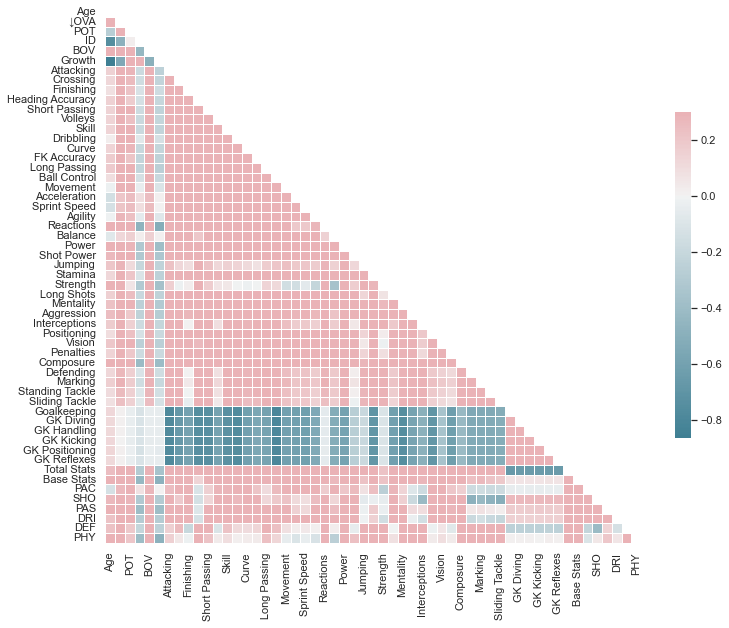

In [11]:
#Correlation
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [12]:
#Finding categorical columns in dataset
df.select_dtypes(include='object').columns

Index(['photoUrl', 'LongName', 'playerUrl', 'Nationality', 'Positions', 'Name',
       'Team & Contract', 'Height', 'Weight', 'foot', 'BP', 'Joined',
       'Loan Date End', 'Value', 'Wage', 'Release Clause', 'W/F', 'SM', 'A/W',
       'D/W', 'IR', 'Hits'],
      dtype='object')

In [13]:
#Finding numerical columns in dataset
num_col = df.select_dtypes(exclude='object').columns
num_col

Index(['Age', '↓OVA', 'POT', 'ID', 'BOV', 'Growth', 'Attacking', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
       'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning',
       'Vision', 'Penalties', 'Composure', 'Defending', 'Marking',
       'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes',
       'Total Stats', 'Base Stats', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY'],
      dtype='object')

In [14]:
df.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,...,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,...,High,Medium,5 ★,91,85,86,94,36,59,\n273


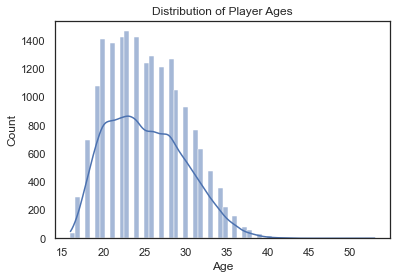

In [15]:
# Plot the distribution of ages
sns.histplot(data=df, x='Age', kde=True)
plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

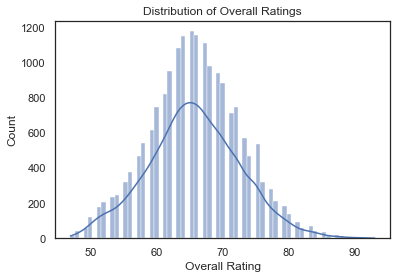

In [16]:
# Plot the distribution of overall ratings
sns.histplot(data=df, x='↓OVA', kde=True)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()

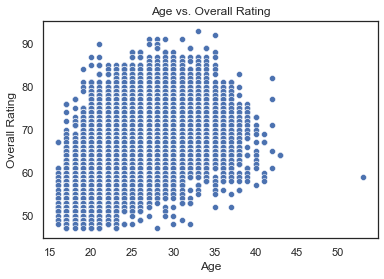

In [17]:
# Plot the relationship between age and overall rating
sns.scatterplot(data=df, x='Age', y='↓OVA')
plt.title('Age vs. Overall Rating')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.show()

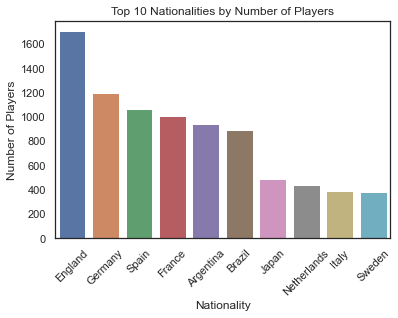

In [18]:
# Plot the top 10 nationalities by number of players
top_nationalities = df['Nationality'].value_counts().head(10)
sns.barplot(x=top_nationalities.index, y=top_nationalities.values)
plt.title('Top 10 Nationalities by Number of Players')
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()

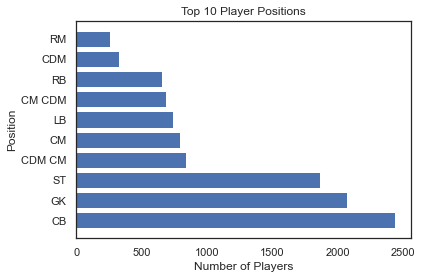

In [19]:
#creating a bar chart showing the distribution of player positions

# Count the number of players in each position
position_counts = df['Positions'].value_counts()

# Get the top 10 player positions
top_positions = position_counts.head(10)

# Create a horizontal bar chart
plt.barh(top_positions.index, top_positions.values)

# Set the chart title and axis labels
plt.title('Top 10 Player Positions')
plt.xlabel('Number of Players')
plt.ylabel('Position')

# Display the chart
plt.show()

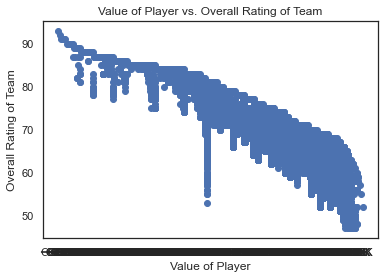

In [20]:
# Select the columns of interest
df_subset = df[['Value', '↓OVA']]

# Create a scatter plot
plt.scatter(df_subset['Value'], df_subset['↓OVA'])

# Set the chart title and axis labels
plt.title('Value of Player vs. Overall Rating of Team')
plt.xlabel('Value of Player')
plt.ylabel('Overall Rating of Team')

# Display the chart
plt.show()

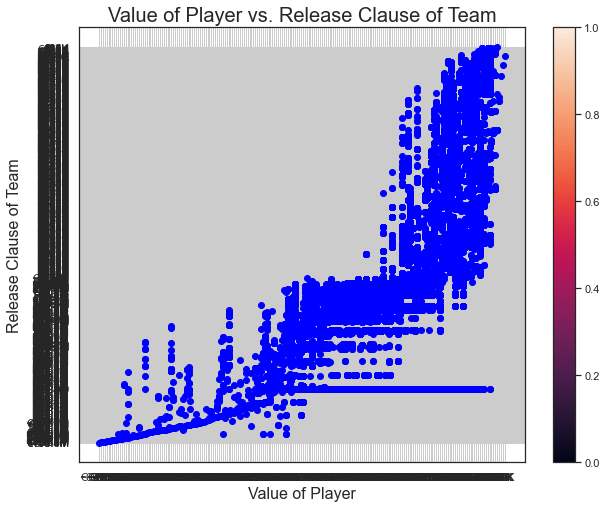

In [21]:
# Select the columns of interest
df_subset = df[['Value', 'Release Clause']]

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(df_subset['Value'], df_subset['Release Clause'], c='blue')
plt.colorbar()

# Set the chart title and axis labels
plt.title('Value of Player vs. Release Clause of Team', fontsize=20)
plt.xlabel('Value of Player', fontsize=16)
plt.ylabel('Release Clause of Team', fontsize=16)

# Add a grid
plt.grid(True)

# Display the chart
plt.show()

In [22]:
#Preprocessing

In [23]:
df.columns

Index(['photoUrl', 'LongName', 'playerUrl', 'Nationality', 'Positions', 'Name',
       'Age', '↓OVA', 'POT', 'Team & Contract', 'ID', 'Height', 'Weight',
       'foot', 'BOV', 'BP', 'Growth', 'Joined', 'Loan Date End', 'Value',
       'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Hits

In [24]:
df_copy = df.copy()

In [25]:
df.columns

Index(['photoUrl', 'LongName', 'playerUrl', 'Nationality', 'Positions', 'Name',
       'Age', '↓OVA', 'POT', 'Team & Contract', 'ID', 'Height', 'Weight',
       'foot', 'BOV', 'BP', 'Growth', 'Joined', 'Loan Date End', 'Value',
       'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Hits

In [26]:
df.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,...,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,...,High,Medium,5 ★,91,85,86,94,36,59,\n273


In [27]:
df.drop(['photoUrl', 'playerUrl', 'Release Clause'], axis=1, inplace=True)

In [28]:
#Checking for missing values
df.isnull().sum()

LongName       0
Nationality    0
Positions      0
Name           0
Age            0
              ..
PAS            0
DRI            0
DEF            0
PHY            0
Hits           0
Length: 74, dtype: int64

In [29]:
num_col = df.select_dtypes(exclude='object').columns
num_col

Index(['Age', '↓OVA', 'POT', 'ID', 'BOV', 'Growth', 'Attacking', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
       'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning',
       'Vision', 'Penalties', 'Composure', 'Defending', 'Marking',
       'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes',
       'Total Stats', 'Base Stats', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY'],
      dtype='object')

In [30]:
numerical_cols = ['Age', '↓OVA', 'POT', 'ID', 'BOV', 'Growth', 'Value', 'Attacking',
       'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing',
       'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility',
       'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina',
       'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending',
       'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping',
       'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning',
       'GK Reflexes', 'Total Stats', 'Base Stats', 'PAC', 'SHO', 'PAS', 'DRI',
       'DEF', 'PHY']
df[numerical_cols].describe()

,Age,↓OVA,POT,ID,BOV,Growth,Attacking,Crossing,Finishing,Heading Accuracy,...,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,...,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,25.194583,65.718636,71.136098,226404.790242,66.751620,5.417461,248.938616,49.688551,45.842932,51.941883,...,16.217609,16.519205,1595.293851,355.703040,67.454239,53.457716,57.681069,62.875494,49.865904,64.368618
std,4.710753,6.968999,6.114176,27141.673349,6.747017,5.663954,74.299764,18.131334,19.566978,17.293626,...,17.002134,17.854185,269.883542,40.762282,10.678058,13.827229,10.081914,9.927875,16.442730,9.601665
min,16.000000,47.000000,47.000000,41.000000,48.000000,0.000000,42.000000,6.000000,3.000000,5.000000,...,2.000000,2.000000,747.000000,232.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000
25%,21.000000,61.000000,67.000000,210135.000000,62.000000,0.000000,222.000000,38.000000,30.000000,44.000000,...,8.000000,8.000000,1452.000000,327.000000,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000
50%,25.000000,66.000000,71.000000,232424.000000,67.000000,4.000000,263.000000,54.000000,49.000000,55.000000,...,11.000000,11.000000,1627.000000,356.000000,68.000000,56.000000,58.000000,64.000000,53.000000,65.000000
75%,29.000000,70.000000,75.000000,246925.500000,71.000000,9.000000,297.000000,63.000000,62.000000,64.000000,...,14.000000,14.000000,1781.000000,384.000000,75.000000,64.000000,64.000000,69.000000,63.000000,71.000000
max,53.000000,93.000000,95.000000,259216.000000,93.000000,26.000000,437.000000,94.000000,95.000000,93.000000,...,91.000000,90.000000,2316.000000,498.000000,96.000000,93.000000,93.000000,95.000000,91.000000,91.000000


In [31]:
# Detect outliers

In [32]:

def detect_outliers_zscore(data, threshold=3):
    """
    Detect outliers using the Z-score method.

    Parameters:
    data (numpy.ndarray): The data to be checked for outliers.
    threshold (float): The Z-score threshold for identifying outliers.

    Returns:
    numpy.ndarray: A boolean array indicating the outliers in the data.
    """
    z_scores = np.abs((data - np.mean(data)) / np.std(data))
    return z_scores > threshold

In [33]:
#Split the data into training and testing sets 

In [34]:
X = df.drop('↓OVA', axis=1)  # Features
y = df['↓OVA']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
top_teams = df.groupby('Nationality')['↓OVA'].mean().sort_values(ascending=False)[:10].index.tolist()
print(top_teams)

['Tanzania', 'Chad', 'Central African Republic', 'Mozambique', 'Bermuda', 'Armenia', 'Egypt', 'New Caledonia', 'Libya', 'Puerto Rico']


In [36]:
df.columns

Index(['LongName', 'Nationality', 'Positions', 'Name', 'Age', '↓OVA', 'POT',
       'Team & Contract', 'ID', 'Height', 'Weight', 'foot', 'BOV', 'BP',
       'Growth', 'Joined', 'Loan Date End', 'Value', 'Wage', 'Attacking',
       'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing',
       'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility',
       'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina',
       'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending',
       'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping',
       'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning',
       'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W',
       'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits'],
      dtype='object')

In [37]:
# Replace single quote and double quote characters with empty strings
df['Height'] = df['Height'].str.replace('\'', '').str.replace('"', '')

# Convert the height feature to float
df['Height'] = df['Height'].astype(float)

In [38]:
# Remove non-numeric characters from weight column
df['Weight'] = df['Weight'].apply(lambda x: re.sub('[^0-9]', '', x))

# Convert weight column to float data type
df['Weight'] = df['Weight'].astype(float)

In [39]:
# create a label encoder object
le = LabelEncoder()

# encode the categorical column
df['foot'] = le.fit_transform(df['foot'])

In [40]:
# Define the target variable
df['is_top_player'] = (df['↓OVA'] >= df['↓OVA'].quantile(0.9)).astype(int)

# Select the features to use in the model
X = ['Age', 'Height', 'Weight', 'Positioning', 'foot', 'Skill', 'Balance', 'Vision', 'Ball Control', 'Goalkeeping',
       'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'Penalties', 'Stamina','Interceptions', 'Strength','Attacking',
       'Crossing', 'Finishing', 'Heading Accuracy','FK Accuracy','Movement','Long Shots','Mentality','Composure','Marking',
       'GK Reflexes', 'Shot Power', 'Long Passing', 'Short Passing', 'Acceleration','Aggression', 'Sliding Tackle', 'Standing Tackle', 'Reactions',  'Dribbling', 'Defending', 'Jumping']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[X], df['is_top_player'], test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9278187565858799


In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[X], df['is_top_player'], test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model using 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model, df[X], df['is_top_player'], cv=kf, scoring='accuracy')

# Compute precision, recall, and F1-score using 10-fold cross-validation
precision_scores = cross_val_score(model, df[X], df['is_top_player'], cv=kf, scoring='precision')
recall_scores = cross_val_score(model, df[X], df['is_top_player'], cv=kf, scoring='recall')
f1_scores = cross_val_score(model, df[X], df['is_top_player'], cv=kf, scoring='f1')


# Print the results
print('Accuracy: {:.4f}'.format(np.mean(scores)))
print('Precision: {:.4f}'.format(np.mean(precision_scores)))
print('Recall: {:.4f}'.format(np.mean(recall_scores)))
print('F1-score: {:.4f}'.format(np.mean(f1_scores)))

Accuracy: 0.9272
Precision: 0.7153
Recall: 0.5359
F1-score: 0.6118


In [45]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute and print the confusion matrix and classification report
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Confusion Matrix:
 [[3316   95]
 [ 179  206]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      3411
           1       0.68      0.54      0.60       385

    accuracy                           0.93      3796
   macro avg       0.82      0.75      0.78      3796
weighted avg       0.92      0.93      0.92      3796

